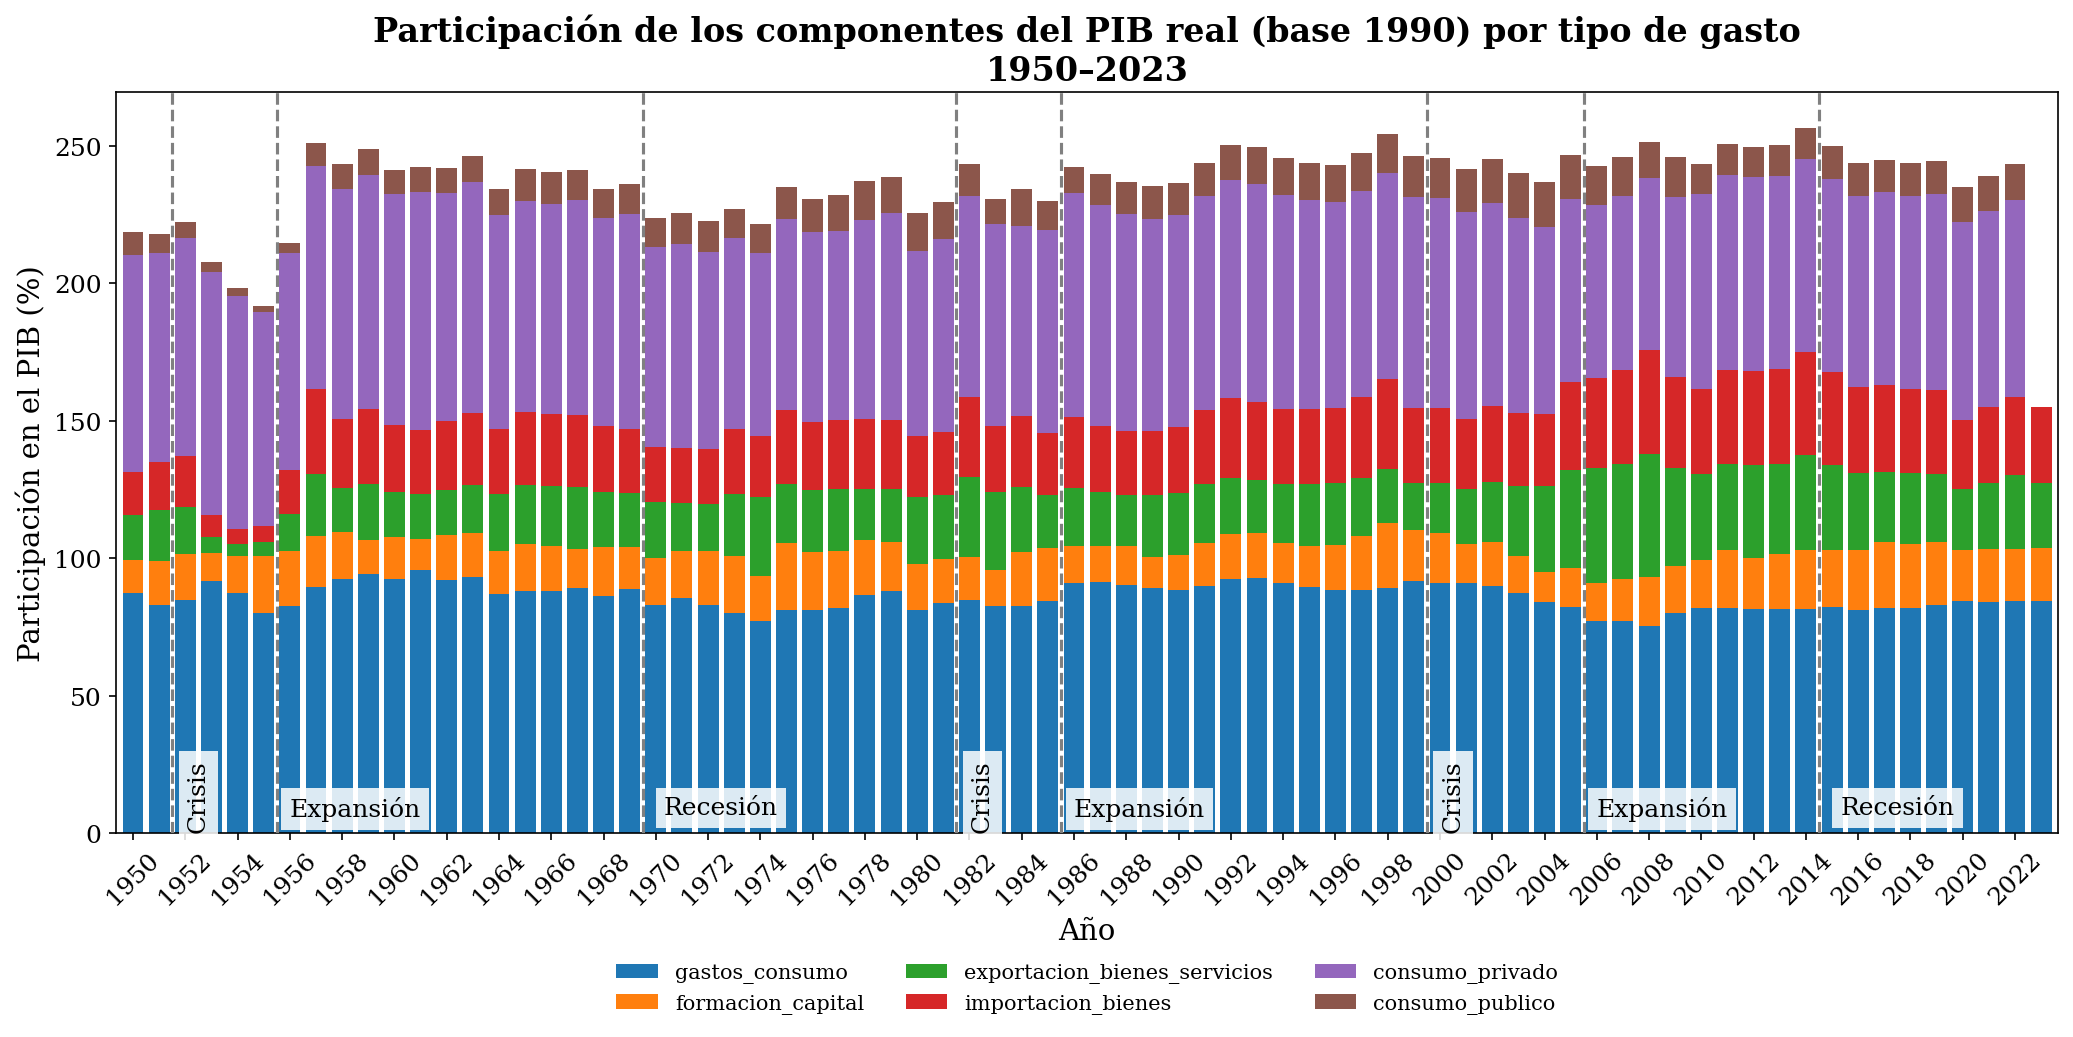

Imagen guardada en: ../../../../assets/tesis/serie_completa/pib/participacion_pib_gasto.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3, os
import numpy as np

# ── 1. Parámetros y rutas ────────────────────────────────────────────────────
CRISIS_52_55      = slice(1952, 1955)   # Crisis
EXPANSION_56_69   = slice(1956, 1969)   # Expansión
RECESION_70_81    = slice(1970, 1981)   # Recesión
CRISIS_82_85      = slice(1982, 1985)   # Crisis (neoliberal)
EXPANSION_86_99   = slice(1986, 1999)   # Expansión
CRISIS_00_05      = slice(2000, 2005)   # Crisis
ACUMULACION_06_13 = slice(2006, 2013)   # Acumulación (expansión)
RECESION_14_23    = slice(2014, 2024)   # Recesión

OUTPUT_DIR = "../../../../assets/tesis/serie_completa/pib"
os.makedirs(OUTPUT_DIR, exist_ok=True)

plt.rcParams.update({
    "font.family": "serif", "font.size": 12,
    "axes.titlesize": 16, "axes.labelsize": 14,
    "grid.linestyle": "--", "lines.linewidth": 2,
    "figure.dpi": 150, "savefig.bbox": "tight"
})

# ── 2. Carga de datos ───────────────────────────────────────────────────────
with sqlite3.connect("../../../../db/proyectomacro.db") as conn:
    df = pd.read_sql_query("SELECT * FROM PIB_Real_Gasto", conn)

df.set_index("año", inplace=True)

# ── 3. Selección de componentes y cálculo de participaciones (%) ───────────
componentes = [
    'gastos_consumo',
    'formacion_capital',
    'exportacion_bienes_servicios',
    'importacion_bienes',
    'consumo_privado',
    'consumo_publico'
]
#offset
# Extraer sólo esas columnas
comp = df[componentes]

# Convertir a porcentaje del PIB real base 1990
pct = comp.div(df["pib_real_base_1990"], axis=0).multiply(100)

# ── 4. Estadísticas promedio por ciclo ──────────────────────────────────────
avg_crisis_52_55      = pct.loc[CRISIS_52_55].mean()
avg_expansion_56_69   = pct.loc[EXPANSION_56_69].mean()
avg_recesion_70_81    = pct.loc[RECESION_70_81].mean()
avg_crisis_82_85      = pct.loc[CRISIS_82_85].mean()
avg_expansion_86_99   = pct.loc[EXPANSION_86_99].mean()
avg_crisis_00_05      = pct.loc[CRISIS_00_05].mean()
avg_acumulacion_06_13 = pct.loc[ACUMULACION_06_13].mean()
avg_recesion_14_23    = pct.loc[RECESION_14_23].mean()

#offsets
hitos_offset = {
    1951: (1, 0.10),
    1955: (3, 0.05),
    1969: (3, 0.05),
    1981: (1, 0.10),
    1985: (3, 0.05),
    1999: (1, 0.10),
    2005: (3, 0.05),
    2014: (3, 0.05)
}

# ── 5. Gráfico stacked-bar ──────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14, 7))

# Mapeo de colores acorde a tus otras gráficas
component_colors = [
    "#1f77b4",  # gastos_consumo
    "#ff7f0e",  # formacion_capital
    "#2ca02c",  # exportacion_bienes_servicios
    "#d62728",  # importacion_bienes
    "#9467bd",  # consumo_privado
    "#8c564b",  # consumo_publico
]

pct.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    width=0.8,
    color=component_colors
)

ax.set_ylabel("Participación en el PIB (%)")
ax.set_xlabel("Año")
ax.set_title(
    "Participación de los componentes del PIB real (base 1990) por tipo de gasto\n1950–2023",
    fontweight="bold"
)

# Leyenda fuera del área de gráfico
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    fontsize=10,
    frameon=False
)
fig.subplots_adjust(bottom=0.25)

# Etiquetas de años cada dos posiciones
positions = np.arange(len(df.index))
plt.xticks(positions[::2], df.index[::2], rotation=45)

# ── 5.1 Hitos visuales ─────────────────────────────────────────────────────
hitos_v = {
    1951: "Crisis",
    1955: "Expansión",
    1969: "Recesión",
    1981: "Crisis",
    1985: "Expansión",
    1999: "Crisis",
    2005: "Expansión",
    2014: "Recesión"
}
fig.subplots_adjust(right=0.72)

for yr, lbl in hitos_v.items():
    if yr in pct.index:
        idx = pct.index.get_loc(yr)
        y_max=ax.get_ylim()[1]
        ax.axvline(
            x=idx + 0.5, color="gray", ls="--", lw=1.5, zorder=5
        )
        dx,dy=hitos_offset.get(yr,(0,0.5))
        ax.text(
            idx + 0.5+dx,dy, lbl, rotation=0 if lbl=='Expansión' or lbl=='Recesión' else 90, ha="center", va="top",
            fontsize=12, color="black",
            transform=ax.get_xaxis_transform(), clip_on=False,
            bbox=dict(facecolor="white", alpha=0.85, edgecolor="none"),
            zorder=6
        )

# ── 6. Guardar y mostrar ───────────────────────────────────────────────────
plt.tight_layout()
out_path = os.path.join(OUTPUT_DIR, "participacion_pib_gasto.png")
plt.savefig(out_path, dpi=300)
plt.show()
print(f"Imagen guardada en: {out_path}")


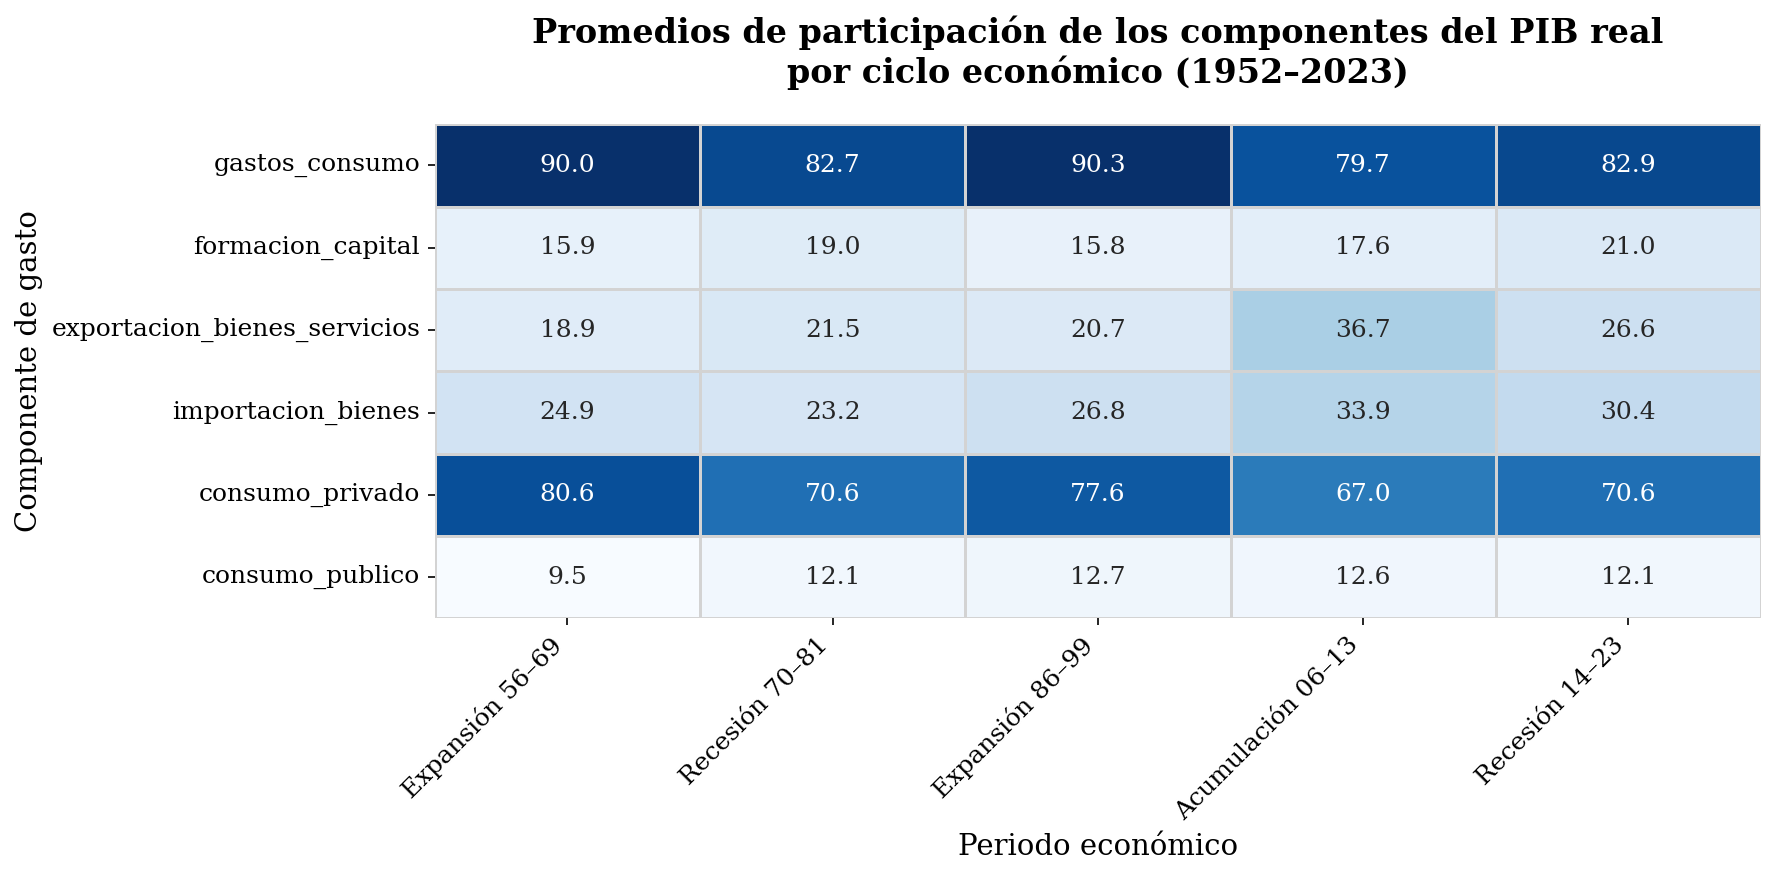

Heatmap de estadísticas guardado en: ../../../assets/tesis/serie_completa/tabla_promedios_pib_gasto_seaborn.png


In [5]:
import seaborn as sns
# ── 1. Agrupar promedios por ciclo en DataFrame ──────────────────────────────
df_means = pd.DataFrame({
    #"Crisis 52–55":      avg_crisis_52_55,
    "Expansión 56–69":   avg_expansion_56_69,
    "Recesión 70–81":    avg_recesion_70_81,
    #"Crisis 82–85":      avg_crisis_82_85,
    "Expansión 86–99":   avg_expansion_86_99,
    #"Crisis 00–05":      avg_crisis_00_05,
    "Acumulación 06–13": avg_acumulacion_06_13,
    "Recesión 14–23":    avg_recesion_14_23,
}).round(1)

# ── 2. Estilo y creación del heatmap ─────────────────────────────────────────
plt.rcParams.update({
    "font.family": "serif", "font.size": 12,
    "axes.titlesize": 16, "axes.labelsize": 14,
    "grid.linestyle": "--", "lines.linewidth": 2,
    "figure.dpi": 150, "savefig.bbox": "tight"
})

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(
    df_means,
    annot=True, fmt=".1f",
    cmap="Blues",        # escala de grises sobria
    cbar=False,
    linewidths=0.5,
    linecolor="lightgray",
    ax=ax
)

ax.set_title(
    "Promedios de participación de los componentes del PIB real\npor ciclo económico (1952–2023)",
    fontweight='bold', pad=20
)
ax.set_ylabel("Componente de gasto")
ax.set_xlabel("Periodo económico")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
out_file = os.path.join(OUTPUT_DIR, "tabla_promedios_pib_gasto_seaborn.png")
plt.savefig(out_file,dpi=300)
plt.show()

print(f"Heatmap de estadísticas guardado en: {out_file}")